In [3]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [4]:
path = 'train.csv'

df = pd.read_csv(path)
#df.head()

In [5]:
df.drop(['PassengerId','Name','Ticket'], axis=1,inplace=True)

In [6]:
from read_file import read_file
read_file(path)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
def chk_types(df):
    dtypes = df.dtypes
    n_unique = df.nunique()
    return pd.DataFrame({'dtypes': dtypes, 'n_unique': n_unique}).transpose()
chk_types(df)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
dtypes,int64,int64,object,float64,int64,int64,float64,object,object
n_unique,2,3,2,88,7,7,248,147,3


In [8]:
from process import chk_types
chk_types(df)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
dtypes,int64,int64,object,float64,int64,int64,float64,object,object
n_unique,2,3,2,88,7,7,248,147,3


In [9]:
cols = ['Survived' , 'Pclass' ,'Sex' , 'Parch' , 'SibSp' , 'Embarked']
df[cols] = df[cols].astype('category')
chk_types(df)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
dtypes,category,category,category,float64,category,category,float64,object,category
n_unique,2,3,2,88,7,7,248,147,3


In [10]:
null = df.isnull().sum()
print("Missing value count:")
ratio = ((null / df.shape[0]) * 100).round(2).astype(str) + '%'
pd.DataFrame({'Null_sum': null, 'Null_ratio %': ratio}).T

Missing value count:


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
Null_sum,0,0,0,177,0,0,0,687,2
Null_ratio %,0.0%,0.0%,0.0%,19.87%,0.0%,0.0%,0.0%,77.1%,0.22%


In [11]:
df1 = df.dropna(subset=['Embarked'])
df2 = df1.copy()  # 'Cabin' column is already dropped, so just copy df1

In [17]:
df.shape

(891, 9)

In [12]:
median = df1['Age'].median()
df1['Age'].fillna(median, inplace=True)

In [13]:
df.head(20)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S
5,0,3,male,NaN,0,0,8.4583,NaN,Q
6,0,1,male,54.0,0,0,51.8625,E46,S
7,0,3,male,2.0,3,1,21.0750,NaN,S
8,1,3,female,27.0,0,2,11.1333,NaN,S
9,1,2,female,14.0,1,0,30.0708,NaN,C


In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:

try:
	num_cols = df.select_dtypes(('number')).columns
	num_cols
except NameError:
	print("Please run the previous cells to define 'df'.")

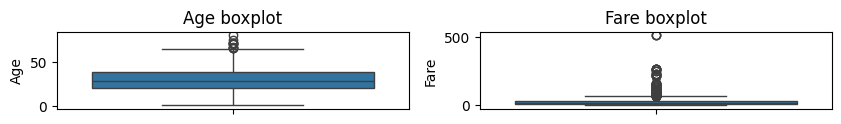

In [16]:
plt.figure(figsize=(10, 1))
for idx, col in enumerate(num_cols):
    plt.subplot(1, len(num_cols), idx + 1)
    sns.boxplot(y=df[col], orient='h')
    plt.title(f"{col} boxplot")


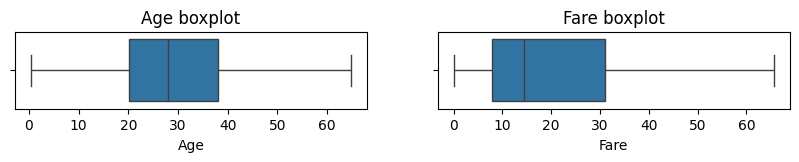

In [17]:
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    lower_outliers = df[df[col] < lower_bound][col].values
    upper_outliers = df[df[col] > upper_bound][col].values
    df[col].replace(lower_outliers, lower_bound, inplace=True)
    df[col].replace(upper_outliers, upper_bound, inplace=True)
plt.figure(figsize=(10, 1))
for idx, col in enumerate(num_cols):
    plt.subplot(1, len(num_cols), idx + 1)
    sns.boxplot(df[col], orient='h')
    plt.title(f"{col} boxplot")


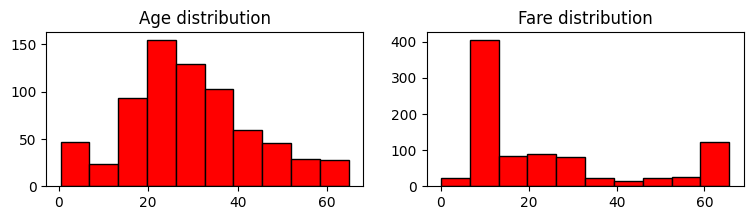

In [18]:
plt.figure(figsize=(9, 2))
for i , col in enumerate(num_cols):
    plt.subplot(1, 2, i + 1) 
    plt.hist(df[col], bins=10, color='red', edgecolor='black') 
    plt.title(f"{col} distribution") 

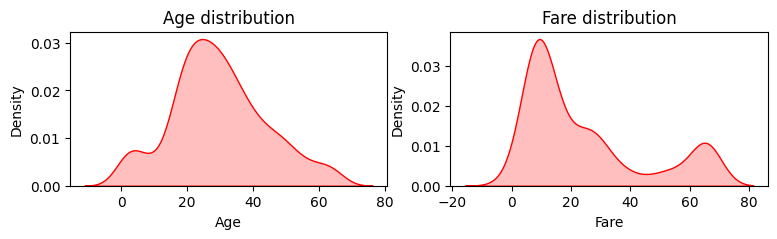

In [19]:
plt.figure(figsize=(9, 2))
for i , col in enumerate(num_cols):
    plt.subplot(1, 2, i + 1) 
    sns.kdeplot(df[col], color='red', fill=True)
    plt.title(f"{col} distribution") 

In [20]:
cat_cols = df.select_dtypes('category').columns
cat_cols

Index(['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked'], dtype='object')

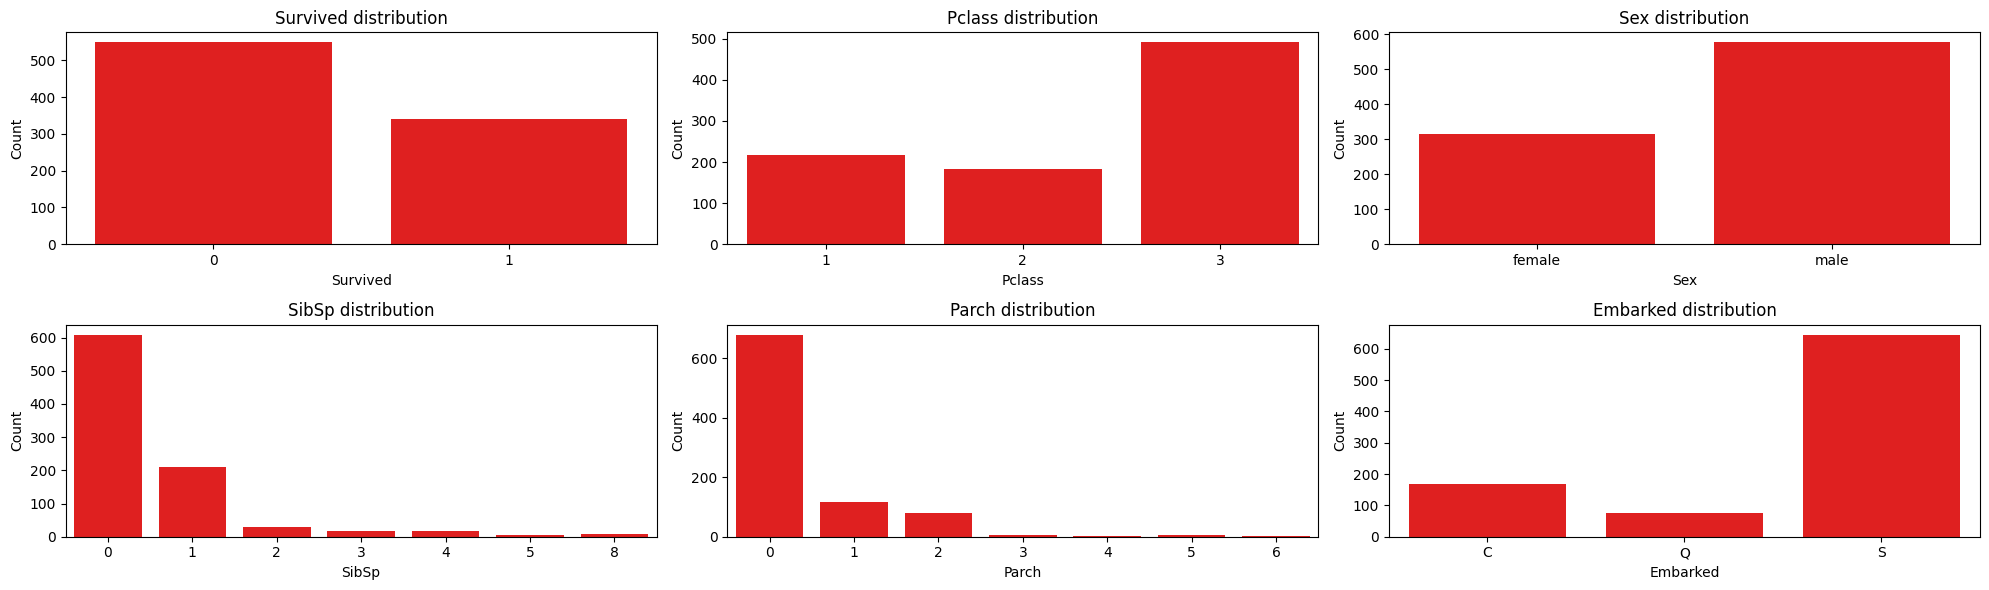

In [21]:
plt.figure(figsize=(20, 6))
for i, col in enumerate(cat_cols):
    plt.subplot(2, 3, i + 1)
    sns.countplot(x=df[col], color='red')
    plt.title(f"{col} distribution")
    plt.xlabel(col)
    plt.ylabel("Count")
plt.tight_layout() 
plt.show()

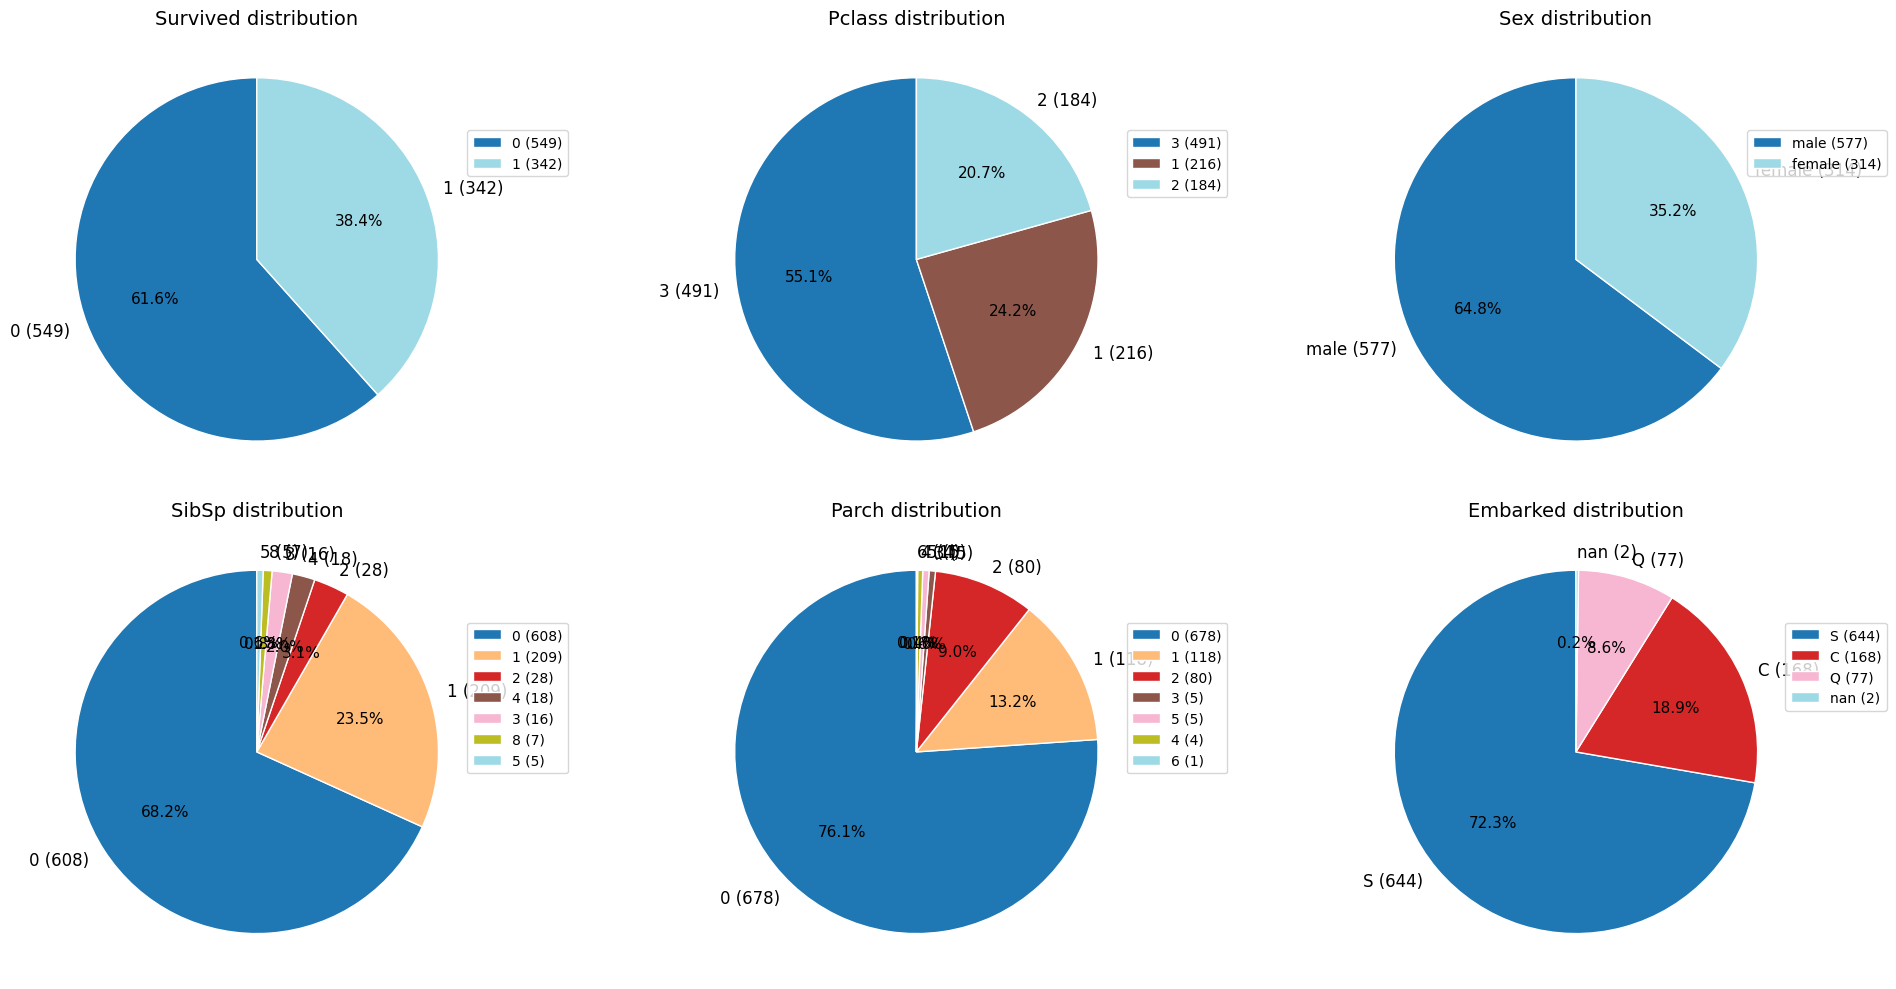

In [23]:
from matplotlib import colors
import matplotlib.cm as cm

plt.figure(figsize=(20, 10))
for i, col in enumerate(cat_cols):
    plt.subplot(2, 3, i + 1)
    unique = df[col].value_counts(dropna=False)
    count = unique.values
    category = [f"{cat} ({cnt})" for cat, cnt in zip(unique.index, count)]
    # Use a colormap to generate colors
    cmap = cm.get_cmap('tab20', len(count))
    pie_colors = [cmap(j) for j in range(len(count))]
    wedges, texts, autotexts = plt.pie(
        count, labels=category, autopct='%1.1f%%', startangle=90,
        colors=pie_colors, textprops={'fontsize': 12}, wedgeprops={'edgecolor': 'white'}
    )
    for autotext in autotexts:
        autotext.set_color('black')
        autotext.set_fontsize(11)
    plt.title(f"{col} distribution", fontsize=14)
    plt.legend(category, loc='upper right', bbox_to_anchor=(1.2, 0.8), fontsize=10)
plt.tight_layout()
plt.show()


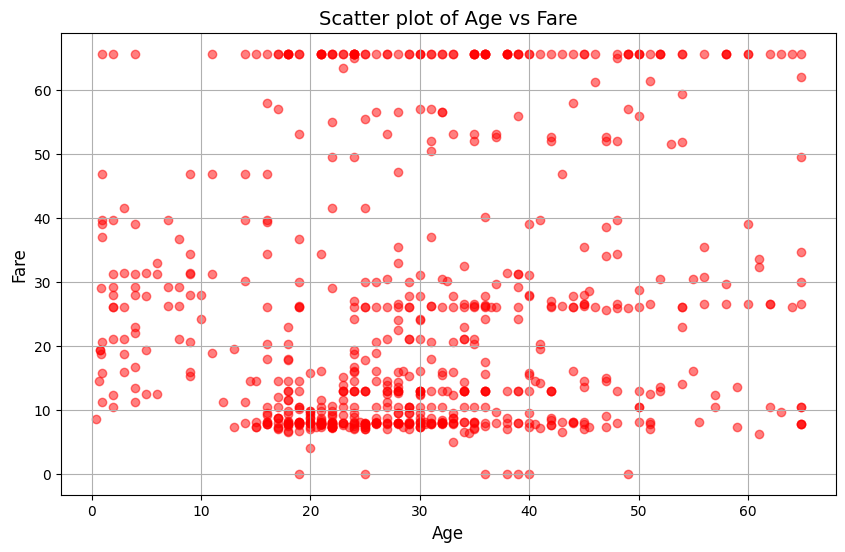

In [24]:
# scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Age'], df['Fare'], c='red' , alpha=0.5)
plt.title('Scatter plot of Age vs Fare', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Fare', fontsize=12)
plt.grid()
plt.show()

In [1]:
#%pip install plotly

import plotly.express as px
px.scatter(df, x='Age', y='Fare', title='Age vs Fare colored by Survival Status')


ModuleNotFoundError: No module named '_plotly_utils'

In [30]:
corr = df[['Age', 'Fare']].corr()
corr


,Age,Fare
Age,1.000000,0.153512
Fare,0.153512,1.000000


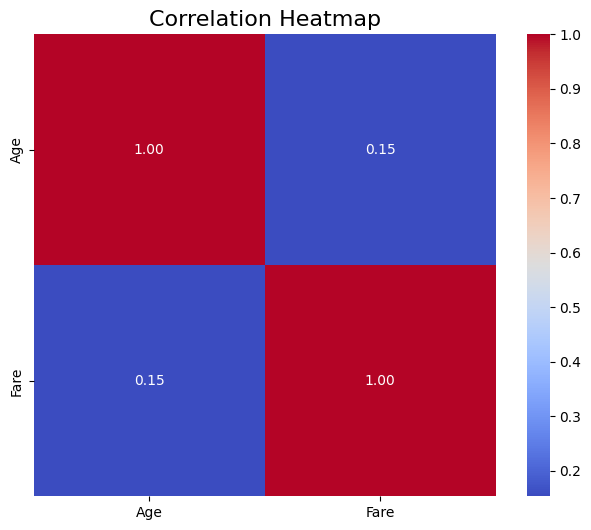

In [31]:
corr = df.select_dtypes(include='number').corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

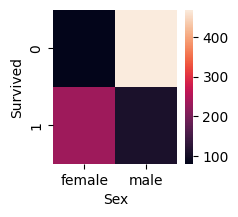

In [32]:

plt.figure(figsize=(2, 2))
agg = df.pivot_table(index='Survived', columns='Sex', values='Age', aggfunc=len)
sns.heatmap(agg)
plt.show()

In [35]:
df.duplicated().sum()

np.int64(0)

In [34]:
df.drop_duplicates(inplace=True)

In [36]:
x = df.drop("Survived" , axis=1)

y = df['Survived']


In [37]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,male,22.0,1,0,7.2500,NaN,S
1,1,female,38.0,1,0,65.6344,C85,C
2,3,female,26.0,0,0,7.9250,NaN,S
3,1,female,35.0,1,0,53.1000,C123,S
4,3,male,35.0,0,0,8.0500,NaN,S


In [38]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: category
Categories (2, int64): [0, 1]

In [39]:
x = df.iloc[:, df.columns != 'Survived'] # Features


In [40]:
x = df.iloc[:, df.columns != 'Survived'] # Features

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
num_cols = x.select_dtypes('number').columns
scaler.fit(x[num_cols])
x[num_cols] = scaler.transform(x[num_cols])

In [41]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,male,0.335132,1,0,0.110460,NaN,S
1,1,female,0.583608,1,0,1.000000,C85,C
2,3,female,0.397251,0,0,0.120745,NaN,S
3,1,female,0.537019,1,0,0.809027,C123,S
4,3,male,0.537019,0,0,0.122649,NaN,S


In [15]:
import plotly.express as px
px.scatter(x, x='Age', y='Fare', title='Age vs Fare after scaling')

ModuleNotFoundError: No module named '_plotly_utils'